In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft
import pandas as pd
from scipy.optimize import minimize
from scipy.optimize import basinhopping
from iminuit import Minuit

import emcee
from pprint import pprint
import time
from multiprocessing import Pool

import random

## 2001 模型检验

In [2]:
# 似然函数 p; D = -2 ln p

def twi_minus_loglikelihood_01(log_A,log_f_b,alpha_H,log_poisson):
    alpha_L = 1.0
    
    perdata01 = pd.read_csv("perlist01_h.csv")
    f = perdata01['f']
    per = perdata01['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata01)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [3]:
m01=Minuit(twi_minus_loglikelihood_01,log_A=math.log(0.005,10),log_f_b=math.log(1.7E-4,10),alpha_H=3.8,log_poisson=0.0,
         error_log_A=0.1,error_log_f_b=0.1,error_alpha_H=0.01,error_log_poisson=0.1,
         limit_log_A=(-5,0), limit_log_f_b=(-7,-2),limit_alpha_H=(1.0,5.0),limit_log_poisson=(-3,3),
         errordef=1)

m01.migrad()

pprint(m01.fval)

FCN = 3994.793252053814 
 TOTAL NCALL = 463 
 NCALLS = 463 
 
 
 EDM = 9.443948592530459e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-1.00462,3.78844,,,-5,0,No
1,log_f_b,-5.06515,3.57033,,,-7,-2,No
2,alpha_H,1.50891,0.455061,,,1,5,No
3,log_poisson,0.00590663,0.124101,,,-3,3,No


3994.793252053814


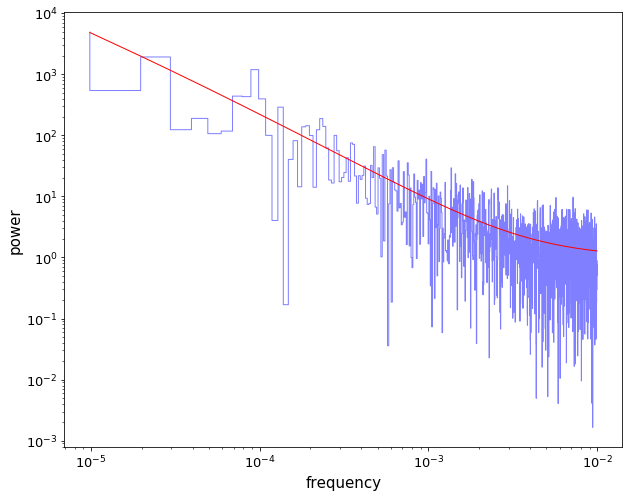

In [4]:
perdata01 = pd.read_csv("perlist01_h.csv")
f_01 = perdata01['f']
per_01 = perdata01['per']

alpha_L = 1.0
log_A,log_f_b,alpha_H,log_poisson = m01.values[0],m01.values[1],m01.values[2],m01.values[3]

model_01 = []
f_length_01 = len(f_01)
for i in range(f_length_01):
    model_01.append(((f_01[i]**(-alpha_L))/(1+(f_01[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_01, per_01, color="b", alpha=0.5, linewidth=1)
plt.plot(f_01, model_01, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

## 2001 模型比较

In [5]:
def twi_minus_loglikelihood_nobreak_01(log_A,alpha,log_poisson):
    alpha_L = 1.0
    
    perdata01 = pd.read_csv("perlist01_h.csv")
    f = perdata01['f']
    per = perdata01['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append((f[i]**(-alpha))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata01)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [6]:
n01=Minuit(twi_minus_loglikelihood_nobreak_01,log_A=-6,alpha=2.0,log_poisson=0.0,
         error_log_A=0.1,error_alpha=0.01,error_log_poisson=0.1,
         limit_log_A=(-8,-2),limit_alpha=(0.0,5.0),limit_log_poisson=(-3,3),
         errordef=1)

n01.migrad()

print(n01.fval)

FCN = 3994.9546278040116 
 TOTAL NCALL = 113 
 NCALLS = 113 
 
 
 EDM = 2.7715381320781837e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-3.41015,0.224246,,,-8,-2,No
1,alpha,1.43849,0.0710913,,,0,5,No
2,log_poisson,-0.0111266,0.0510003,,,-3,3,No


3994.9546278040116


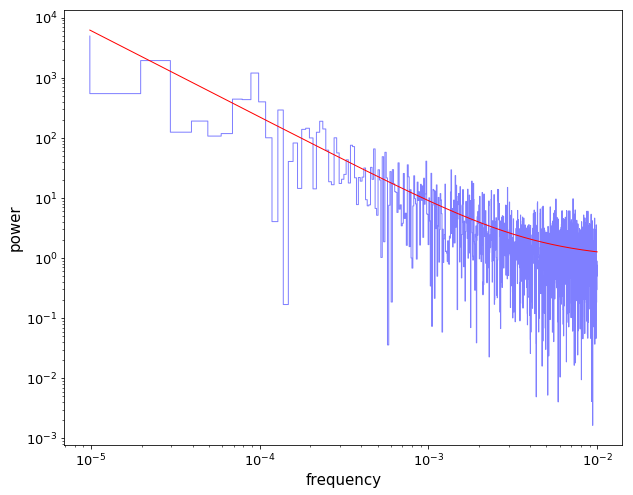

In [7]:
log_A,alpha,log_poisson = n01.values[0],n01.values[1],n01.values[2]

model_nob_01 = []
f_length_01 = len(f_01)
for i in range(f_length_01):
    model_nob_01.append((f_01[i]**(-alpha))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_01, per_01, color="b", alpha=0.5, linewidth=1)
plt.plot(f_01, model_nob_01, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

0.16137575019774886


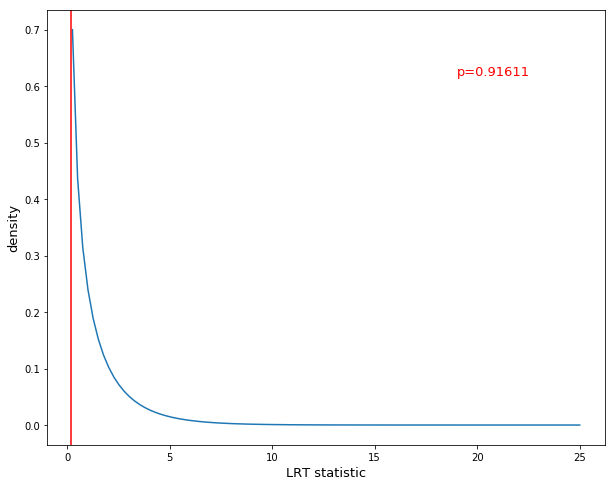

In [8]:
import scipy.stats as stats

# LRT statistic
T = n01.fval-m01.fval
print(T)

p = stats.chi2.pdf(T,1)
p1 = ("%.5f" % p)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.plot(np.linspace(0,25,100),stats.chi2.pdf(np.linspace(0,25,100),df=1))
plt.axvline(T,color="r")
plt.text(0.8,0.85,'p=%s'%p1,color='red',ha='center',transform=ax.transAxes,fontsize=13)
plt.xlabel("LRT statistic",fontsize=13)
plt.ylabel("density",fontsize=13)
plt.show()

## 2018(2) 模型检验

In [9]:
# 似然函数 p; D = -2 ln p

def twi_minus_loglikelihood_182(log_A,log_f_b,alpha_H,log_poisson):
    alpha_L = 1.0
    
    perdata182 = pd.read_csv("perlist182_h.csv")
    f = perdata182['f']
    per = perdata182['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata182)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [10]:
m182=Minuit(twi_minus_loglikelihood_182,log_A=math.log(0.005,10),log_f_b=math.log(1.7E-4,10),alpha_H=3.8,log_poisson=0.0,
         error_log_A=0.1,error_log_f_b=0.1,error_alpha_H=0.01,error_log_poisson=0.1,
         limit_log_A=(-3,0), limit_log_f_b=(-7,-2),limit_alpha_H=(1.0,5.0),limit_log_poisson=(-3,3),
         errordef=1)

m182.migrad()

pprint(m182.fval)

FCN = 4304.571803010067 
 TOTAL NCALL = 599 
 NCALLS = 599 
 
 
 EDM = 2.1726085517364276e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-1.89431,0.05317,,,-3,0,No
1,log_f_b,-2.5036,0.0847639,,,-7,-2,No
2,alpha_H,3.80673,1.13191,,,1,5,No
3,log_poisson,0.469603,0.0371848,,,-3,3,No


4304.571803010067


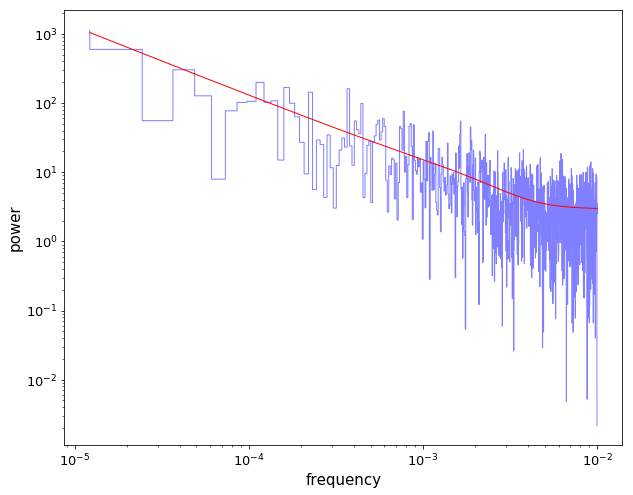

In [11]:
perdata182 = pd.read_csv("perlist182_h.csv")
f_182 = perdata182['f']
per_182 = perdata182['per']

alpha_L = 1.0
log_A,log_f_b,alpha_H,log_poisson = m182.values[0],m182.values[1],m182.values[2],m182.values[3]

model_182 = []
f_length_182 = len(f_182)
for i in range(f_length_182):
    model_182.append(((f_182[i]**(-alpha_L))/(1+(f_182[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_182, per_182, color="b", alpha=0.5, linewidth=1)
plt.plot(f_182, model_182, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

## 2018(2) 模型比较

In [12]:
def twi_minus_loglikelihood_nobreak_182(log_A,alpha,log_poisson):
    alpha_L = 1.0
    
    perdata182 = pd.read_csv("perlist182_h.csv")
    f = perdata182['f']
    per = perdata182['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append((f[i]**(-alpha))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata182)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [13]:
n182=Minuit(twi_minus_loglikelihood_nobreak_182,log_A=-2,alpha=2.0,log_poisson=0.0,
         error_log_A=0.1,error_alpha=0.01,error_log_poisson=0.1,
         limit_log_A=(-5,0),limit_alpha=(0.0,5.0),limit_log_poisson=(-3,3),
         errordef=1)

n182.migrad()

pprint(n182.fval)

FCN = 4309.471616935308 
 TOTAL NCALL = 186 
 NCALLS = 186 
 
 
 EDM = 1.3909086457437561e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-2.03137,0.269457,,,-5,0,No
1,alpha,1.04142,0.0853046,,,0,5,No
2,log_poisson,0.185154,0.108217,,,-3,3,No


4309.471616935308


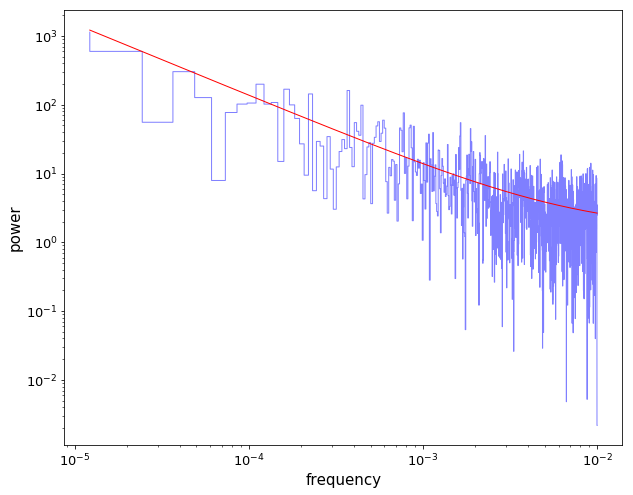

In [14]:
log_A,alpha,log_poisson = n182.values[0],n182.values[1],n182.values[2]

model_nob_182 = []
f_length_182 = len(f_182)
for i in range(f_length_182):
    model_nob_182.append((f_182[i]**(-alpha))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_182, per_182, color="b", alpha=0.5, linewidth=1)
plt.plot(f_182, model_nob_182, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

4.899813925240778


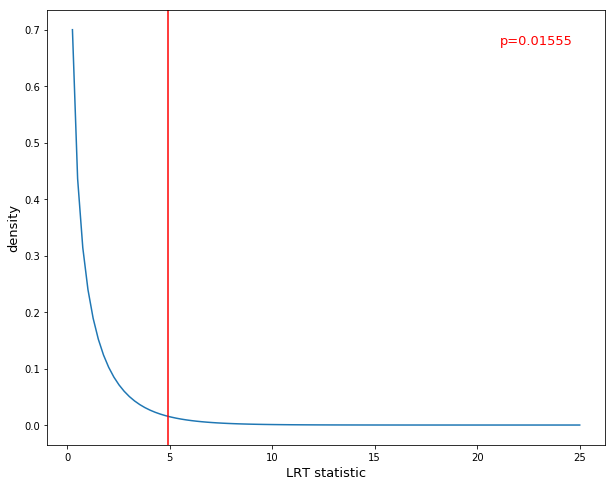

In [15]:
import scipy.stats as stats

# LRT statistic
T = n182.fval-m182.fval
print(T)

p = stats.chi2.pdf(T,1)
p1 = ("%.5f" % p)
plt.figure(figsize=(10,8))
plt.plot(np.linspace(0,25,100),stats.chi2.pdf(np.linspace(0,25,100),df=1))
plt.axvline(T,color="r")
plt.text(0.8,0.85,'p=%s'%p1,color='red',ha='center',transform=ax.transAxes,fontsize=13)
plt.xlabel("LRT statistic",fontsize=13)
plt.ylabel("density",fontsize=13)
plt.show()

## 综合结果

In [16]:
data01 = pd.read_csv("energy_ngc4051_01.csv")  
x01 = data01['x']
y01 = data01['y']
xerr01 = data01['xerr']
yerr01 = data01['yerr']

data182 = pd.read_csv("energy_ngc4051_182.csv")  
x182 = data182['x']
y182 = data182['y']
xerr182 = data182['xerr']
yerr182 = data182['yerr']

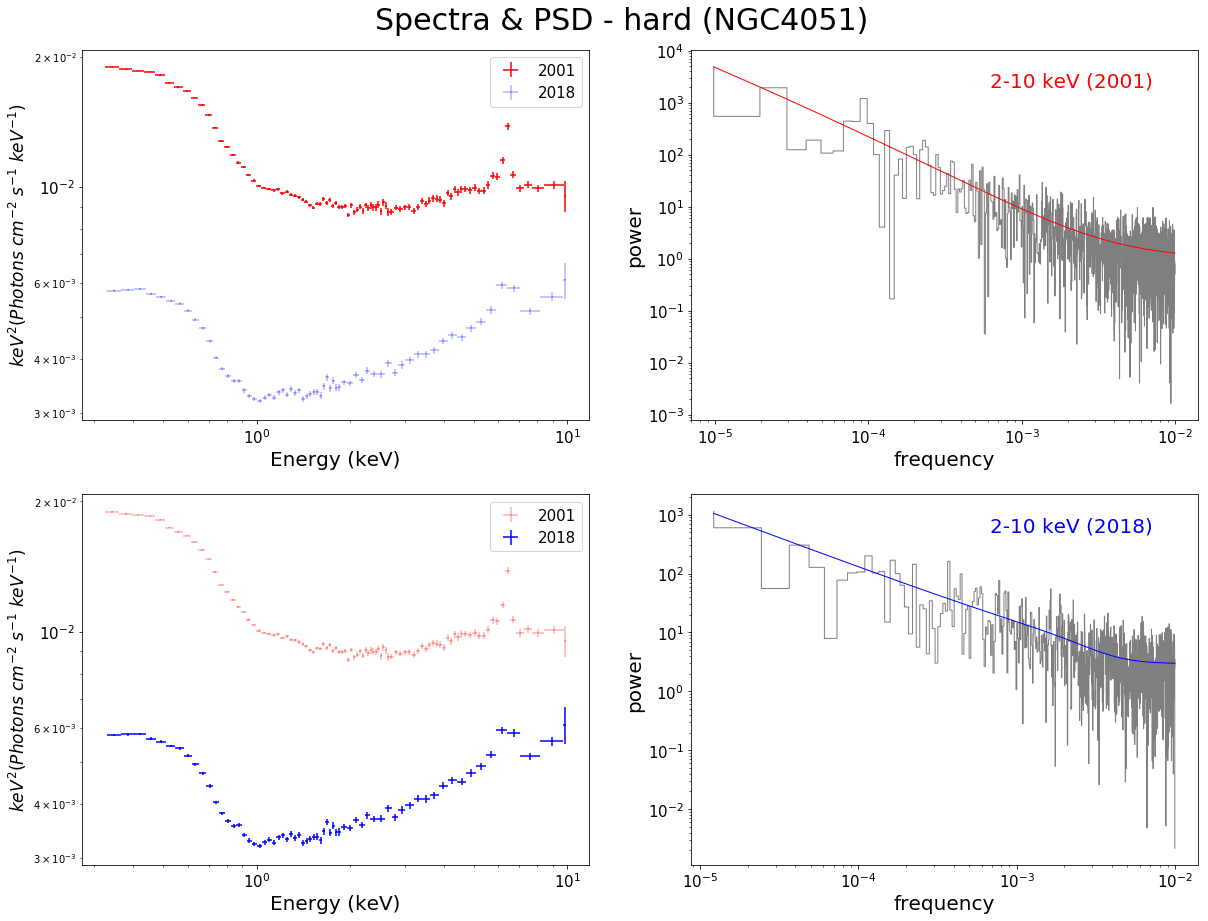

In [17]:
fig= plt.figure(figsize=(20,15))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)


ax1.loglog()
ax1.errorbar(x01, y01, yerr=yerr01, xerr=xerr01, fmt=',r', label='2001')
ax1.errorbar(x182, y182, yerr=yerr182, xerr=xerr182, fmt=',b', alpha=0.3, label='2018')
ax1.set_xlabel("Energy (keV)",fontsize=20)
ax1.set_ylabel(r"$keV^2 (Photons{\ }cm^{-2}{\ } s^{-1}{\ } keV^{-1})$",fontsize=17)
ax1.legend(fontsize=15)
ax1.tick_params(labelsize=15)

ax3.loglog()
ax3.errorbar(x01, y01, yerr=yerr01, xerr=xerr01, fmt=',r', alpha=0.3, label='2001')
ax3.errorbar(x182, y182, yerr=yerr182, xerr=xerr182, fmt=',b', label='2018')
ax3.set_xlabel("Energy (keV)",fontsize=20)
ax3.set_ylabel(r"$keV^2 (Photons{\ }cm^{-2}{\ } s^{-1}{\ } keV^{-1})$",fontsize=17)
ax3.legend(fontsize=15)
ax3.tick_params(labelsize=15)


ax2.loglog()
ax2.step(f_01, per_01, color="k", alpha=0.5, linewidth=1)
ax2.plot(f_01, model_01, color="r", linewidth=1)
ax2.set_xlabel("frequency",fontsize=20)
ax2.set_ylabel("power",fontsize=20)
ax2.text(0.75,0.9,"2-10 keV (2001)",color='r',ha='center',transform=ax2.transAxes,fontsize=20)
ax2.tick_params(labelsize=15)

ax4.loglog()
ax4.step(f_182, per_182, color="k", alpha=0.5, linewidth=1)
ax4.plot(f_182, model_182, color="b", linewidth=1)
ax4.set_xlabel("frequency",fontsize=20)
ax4.set_ylabel("power",fontsize=20)
ax4.text(0.75,-0.3,"2-10 keV (2018)",color='b',ha='center',transform=ax2.transAxes,fontsize=20)
ax4.tick_params(labelsize=15)


plt.suptitle("Spectra & PSD - hard (NGC4051)", x=0.5, y=0.92, fontsize=30)
plt.show()